# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [246]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

## Read the Mapbox API key

In [247]:
load_dotenv("sample.env")
map_box_api = os.getenv("mapbox")

# Load Data

## Read the census data into a Pandas DataFrame

In [248]:
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


- - - 

# Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



## Calculate the mean number of housing units per year

In [249]:
housing_units_avg = sfo_data.groupby('year')['housing_units'].mean()
housing_units_avg

year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

In [250]:
# Save the dataframe as a csv file



## Calculate the min 

In [251]:
sfo_data_min = housing_units_avg.min()
sfo_data_min

372560.0

## Calculate the max

In [252]:
sfo_data_max = housing_units_avg.max()
sfo_data_max

384242.0

## Calculate the std

In [253]:
sfo_data_std = housing_units_avg.std()
sfo_data_std

4206.0007132667015

# Use the Pandas plot function to plot the average housing units per year.
#### Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

## Plot the average housing units per year

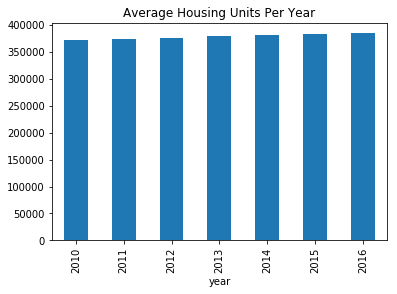

In [254]:
housing_units_avg.plot.bar(
    title="Average Housing Units Per Year"
)

## Optional Challenge: Use the min, max, and std to scale the y limits of the chart


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

## Calculate the average sale price per square foot and average gross rent per year

In [255]:
# Read in data
housing_costs = pd.read_csv(
    Path("Data/sfo_neighborhoods_census_data.csv"),
    infer_datetime_format=True,
    parse_dates=False,
    
)


# Slice data and group
averages_df = (
    housing_costs[["year","neighborhood","sale_price_sqr_foot", "gross_rent"]]
    .groupby(["year"])
    .mean(["sale_price_sqr_foot","gross_rent"])
)

averages_df.head(10)

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


## Create two line charts, one to plot the average sale price per square foot and another for average montly rent

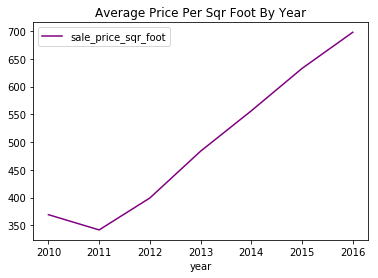

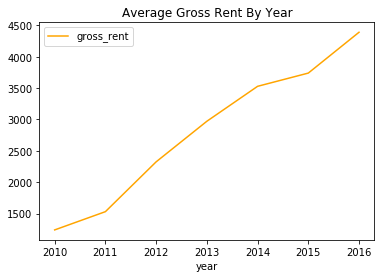

In [256]:
# Line chart for average sale price per square foot
sale_price = (
    averages_df[["sale_price_sqr_foot"]]
)

sale_price.plot(title="Average Price Per Sqr Foot By Year", color="purple")
                 
# Line chart for average montly rent
monthly_rent = (
    averages_df[["gross_rent"]]
)

monthly_rent.plot(
    title="Average Gross Rent By Year", 
    color="orange"
)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

## Group by year and neighborhood and then create a new dataframe of the mean values

In [257]:
# Create a new dataframe of the mean values
housing_cost = pd.read_csv(
    Path("Data/sfo_neighborhoods_census_data.csv"),
    infer_datetime_format=True,
    parse_dates=False,
)

housing_costs = pd.DataFrame(
    housing_cost[["year", "neighborhood", "sale_price_sqr_foot", "gross_rent"]]
    .groupby(["year","neighborhood"])["sale_price_sqr_foot","gross_rent"].mean()
    .reset_index()
    
)
housing_costs.head(9)

,year,neighborhood,sale_price_sqr_foot,gross_rent
0,2010,Alamo Square,291.182945,1239.0
1,2010,Anza Vista,267.932583,1239.0
2,2010,Bayview,170.098665,1239.0
3,2010,Buena Vista Park,347.394919,1239.0
4,2010,Central Richmond,319.027623,1239.0
5,2010,Central Sunset,418.172493,1239.0
6,2010,Corona Heights,369.359338,1239.0
7,2010,Cow Hollow,569.379968,1239.0
8,2010,Croker Amazon,165.645730,1239.0


In [258]:
# Use hvplot to create an interactive line chart of the average price per sq ft. 
# The plot should have a dropdown selector for the neighborhood

neib_means_df = pd.DataFrame(
    housing_cost[["year", "neighborhood","sale_price_sqr_foot"]]
    .groupby(["neighborhood","year"])['sale_price_sqr_foot'].mean()
)

neib_means_df.hvplot.line(
    xlabel="Year", 
    ylabel="Average Price Per Sq Ft", 
    rot=90, width=600, 
    height=400, 
    widget_location='right_top', 
    groupby='neighborhood'
)

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()

In [259]:
# Use hvplot to create an interactive line chart of the average monthly rent
# The plot should have a dropdown selector for the neighborhood

gross_rent_df = pd.DataFrame(
    housing_cost[["year", "neighborhood","gross_rent"]]
    .groupby(["neighborhood","year"])['gross_rent'].mean()
)
gross_rent_df.hvplot.line(
    xlabel="Year", 
    ylabel="Average Rent", 
    rot=90, width=600, 
    height=400,
    widget_location='right_top', 
    groupby='neighborhood'
)

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [260]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


## Getting the data from the top 10 expensive neighborhoods to own

In [261]:
# Read in data
exp_neighborhood_df = pd.read_csv(
    Path("Data/sfo_neighborhoods_census_data.csv"),
    infer_datetime_format=True,
    parse_dates=False,
    
)

# Slice data and group
most_exp_df = (
   exp_neighborhood_df[["neighborhood","sale_price_sqr_foot"]]
    .groupby("neighborhood")
    .mean()
).sort_values("sale_price_sqr_foot",ascending=False)

# Slice out the top 10 most expensive 
ten_most_exp = most_exp_df.iloc[:10]
ten_most_exp

,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


In [262]:
# Plotting the data from the top 10 expensive neighborhoods
ten_most_exp.hvplot.bar(
    x="neighborhood",
    width=700, 
    height=500, 
    rot=45
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

## Fetch the previously generated DataFrame that was grouped by year and neighborhood

In [263]:
housing_costs.head()

,year,neighborhood,sale_price_sqr_foot,gross_rent
0,2010,Alamo Square,291.182945,1239.0
1,2010,Anza Vista,267.932583,1239.0
2,2010,Bayview,170.098665,1239.0
3,2010,Buena Vista Park,347.394919,1239.0
4,2010,Central Richmond,319.027623,1239.0


In [264]:
# Plotting the data from cost to purhcase vs rental income
housing_costs.hvplot.bar(
    x="year",
    rot=90, 
    width=600, 
    height=400, 
    ylabel="Purchase Price/Rental Income",
    xlabel='Year', 
    groupby="neighborhood"
)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [265]:
# Load neighborhoods coordinates data
# Read in data
neibs_coords_df = pd.read_csv(
    Path("Data/neighborhoods_coordinates.csv"),
    infer_datetime_format=True,
    parse_dates=False,
)
neibs_coords_df.head(4)

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [266]:
# Calculate the mean values for each neighborhood
# Read in data
housing_costs = pd.read_csv(
    Path("Data/sfo_neighborhoods_census_data.csv"),
    infer_datetime_format=True,
    parse_dates=False,
    
)

# Slice data and group
mean_values_df = (
    housing_cost[["neighborhood","sale_price_sqr_foot", "housing_units","gross_rent"]]
    .groupby("neighborhood")
    .mean(["sale_price_sqr_foot","housing_units","gross_rent"])
    .reset_index()
    
)

mean_values_df.head(5)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [267]:
# Join the average values with the neighborhood locations and cleaned data
joined_avg_coords_one = neibs_coords_df.join(
    mean_values_df,
    on=None, 
    how='left', 
    lsuffix="neighborhood",
    rsuffix="Neighborhood"
)

joined_avg_coords_two = joined_avg_coords_one.drop(
    columns="neighborhood"
)

joined_avg_coords_two.head(5)

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

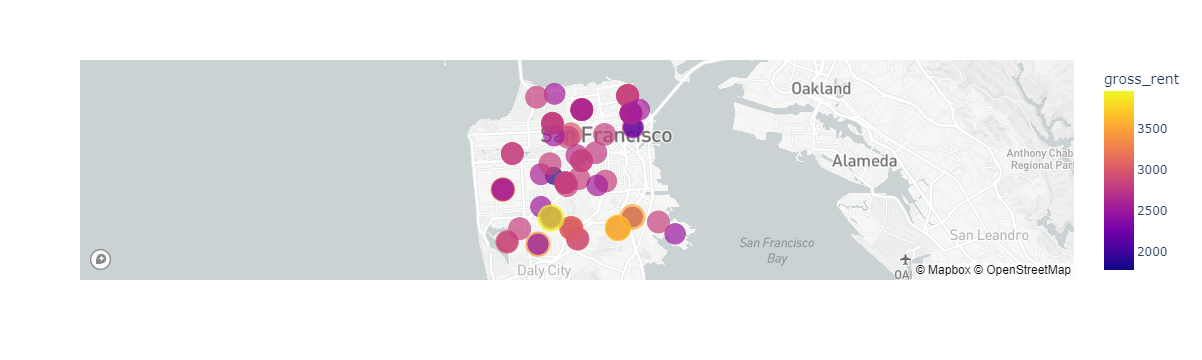

In [268]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    joined_avg_coords_two,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="gross_rent",
    zoom=10,
)

# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [276]:
# Fetch the data from all expensive neighborhoods per year.
exp_neighborhood = pd.read_csv(
    Path("Data/sfo_neighborhoods_census_data.csv"),
    infer_datetime_format=True,
    parse_dates=False,
    
)

# Slice and group data and group
most_exp_year = (
   exp_neighborhood[["neighborhood","year","sale_price_sqr_foot","housing_units","gross_rent"]]
    .groupby(["neighborhood"])
    .mean()
).sort_values("sale_price_sqr_foot",ascending=False)

most_exp_year = most_exp_year.head(10) 
most_exp_year

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Union Square District,2012.500000,903.993258,377427.50,2555.166667
Merced Heights,2014.000000,788.844818,380348.00,3414.000000
Miraloma Park,2011.750000,779.810842,375967.25,2155.250000
Pacific Heights,2013.000000,689.555817,378401.00,2817.285714
Westwood Park,2015.000000,687.087575,382295.00,3959.000000
Telegraph Hill,2013.000000,676.506578,378401.00,2817.285714
Presidio Heights,2013.000000,675.350212,378401.00,2817.285714
Cow Hollow,2013.000000,665.964042,378401.00,2817.285714
Potrero Hill,2013.000000,662.013613,378401.00,2817.285714


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


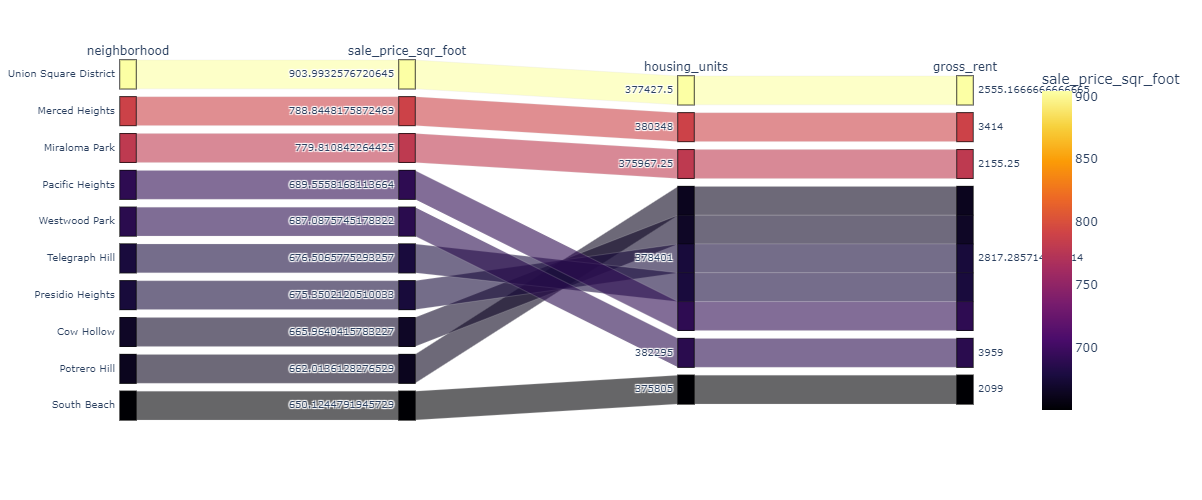

In [270]:
# Create parallel categories plot
px.parallel_categories(
        most_exp_year,
        dimensions=["neighborhood","sale_price_sqr_foot","housing_units","gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        width=900,
        height=500,
)

### Parralell categories plot 

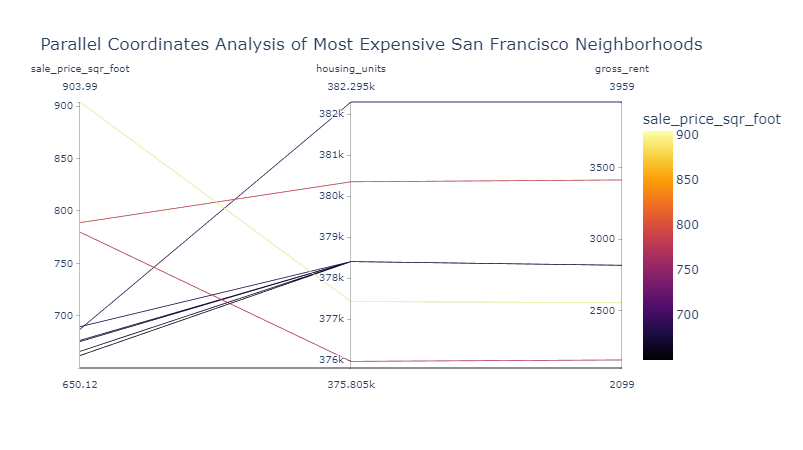

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

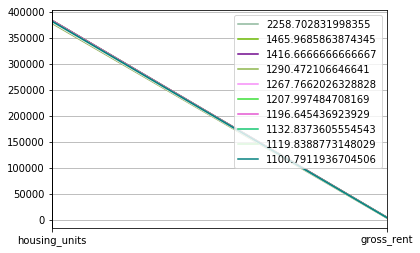

In [292]:
exp_year_plot = (
   exp_neighborhood[["neighborhood","year","sale_price_sqr_foot","housing_units","gross_rent"]]
    .groupby(["year","neighborhood"])
    .mean()
).sort_values(["sale_price_sqr_foot"],ascending=False)

exp_year_plot = exp_year_plot.head(10)

pd.plotting.parallel_coordinates(
    exp_year_plot, 
    "sale_price_sqr_foot", 
    cols=None, 
    ax=None, 
    color=None, 
    use_columns=False, 
    xticks=None, 
    colormap=None, 
    axvlines=True, 
    axvlines_kwds=None, 
)

### Parallel coordinates plot

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

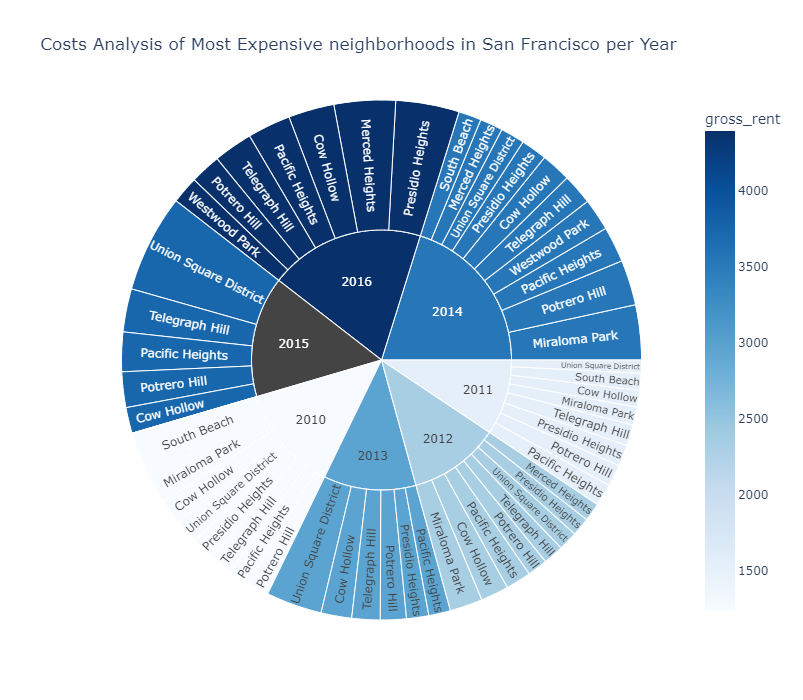

In [23]:
# Sunburst Plot
# YOUR CODE HERE!